In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
h = 0.001     # time step
R_0 = -2.0    # initial value of R
J_0 = 3.0     # initial value of J
n = 1000      # number of data points

## Data import

In [4]:
data = pd.read_csv("/content/drive/MyDrive/exact.csv")
data.columns = ["Step", "R", "J"]
data.head()

,Step,R,J
0,0,"-1,678969244","3,635587444"
1,1,"-1,331199653","1,092044203"
2,2,"-3,262655098","2,6063602"
3,3,"0,7475997113","2,653502669"
4,4,"-2,595587134","2,486162931"


In [5]:
data.dtypes

Step     int64
R       object
J       object
dtype: object

In [6]:
# convert R and J to float
data["R"] = data["R"].str.replace(',', '.').astype('float')
data["J"] = data["J"].str.replace(',', '.').astype('float')

In [7]:
# adjust the step
data["Step"] += 1

In [8]:
data.head(10)

,Step,R,J
0,1,-1.678969,3.635587
1,2,-1.331200,1.092044
2,3,-3.262655,2.606360
3,4,0.747600,2.653503
4,5,-2.595587,2.486163
5,6,-2.206740,2.309700
6,7,-1.319781,4.438445
7,8,-1.789069,3.480226
8,9,-4.806522,1.821735
9,10,-1.434671,2.193432


## Data visualization

Text(0, 0.5, 'Love')

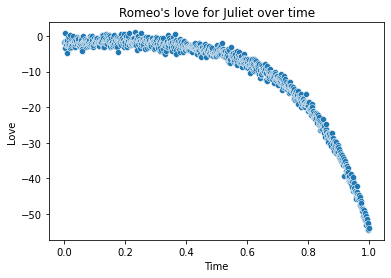

In [9]:
# Plotting Romeo's love
sns.scatterplot(x = data["Step"] * 0.001, y = data["R"])
plt.title("Romeo's love for Juliet over time")
plt.xlabel("Time")
plt.ylabel("Love")

Text(0, 0.5, 'Love')

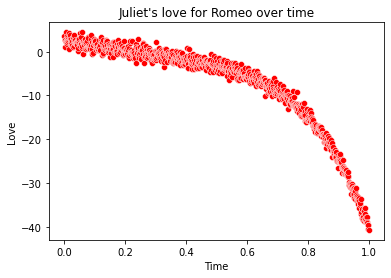

In [10]:
# Plotting Juliet's love
sns.scatterplot(x = data["Step"] * 0.001, y = data["J"], color = "red")
plt.title("Juliet's love for Romeo over time")
plt.xlabel("Time")
plt.ylabel("Love")

## Model building

In [11]:
# Convert to true values to tensor
true_values = tf.convert_to_tensor(data[["R", "J"]], dtype=float)

In [12]:
# Variable definition
## [[a, b],
##  [c, d]]
coefs = tf.Variable(tf.random.normal([2, 2], seed = 0))
coefs

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.39915758,  2.1044393 ],
       [ 0.17107224,  0.54651815]], dtype=float32)>

In [13]:
# Hyperparameters
learning_rate = 0.005
iterations = 150

In [14]:
# Euler method
eye = tf.constant([[1, 0], [0, 1]], dtype = float)

## prev is a vector of the form [R_n-1, J_n-1]
## returns [R_n, J_n]
def eulerApproxNext(prev, coefs, h):
    return tf.reduce_sum(prev * (coefs * h + eye), 1)

In [15]:
# Training
iter_slots = tf.zeros([n])
initial_values = tf.constant([R_0, J_0])
for i in range(iterations):
    print("Iteration", i)
    with tf.GradientTape() as tape:
        approx_values = tf.scan(lambda prev, _: eulerApproxNext(prev, coefs, h), iter_slots, initializer = initial_values)
        error = tf.reduce_sum((approx_values - true_values) ** 2) / (2 * n)
    grads = tape.gradient(error, coefs)
    coefs.assign_add(-grads * learning_rate)
    print("   Loss:", error.numpy())

Iteration 0
   Loss: 323.61346
Iteration 1
   Loss: 292.9441
Iteration 2
   Loss: 277.5308
Iteration 3
   Loss: 267.68604
Iteration 4
   Loss: 260.62527
Iteration 5
   Loss: 255.18047
Iteration 6
   Loss: 250.7626
Iteration 7
   Loss: 247.03491
Iteration 8
   Loss: 243.78688
Iteration 9
   Loss: 240.87996
Iteration 10
   Loss: 238.21733
Iteration 11
   Loss: 235.72495
Iteration 12
   Loss: 233.34889
Iteration 13
   Loss: 231.03963
Iteration 14
   Loss: 228.75763
Iteration 15
   Loss: 226.46602
Iteration 16
   Loss: 224.1259
Iteration 17
   Loss: 221.70047
Iteration 18
   Loss: 219.14624
Iteration 19
   Loss: 216.41354
Iteration 20
   Loss: 213.44542
Iteration 21
   Loss: 210.16635
Iteration 22
   Loss: 206.48502
Iteration 23
   Loss: 202.27562
Iteration 24
   Loss: 197.37247
Iteration 25
   Loss: 191.53853
Iteration 26
   Loss: 184.4487
Iteration 27
   Loss: 175.62407
Iteration 28
   Loss: 164.36636
Iteration 29
   Loss: 149.65735
Iteration 30
   Loss: 130.16933
Iteration 31
   Loss: 1

In [16]:
coefs

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.947692 ,  1.6607691],
       [ 3.5967438, -0.3979798]], dtype=float32)>

## Perfomance Evaluation

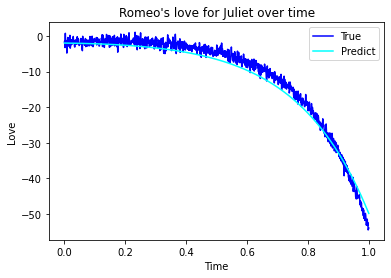

In [19]:
plt.plot(np.arange(0.001, 1.001, 0.001), data["R"], color = "blue", label = "True")
plt.plot(np.arange(0.001, 1.001, 0.001), approx_values[:, 0], color = "cyan", label = "Predict")
plt.title("Romeo's love for Juliet over time")
plt.xlabel("Time")
plt.ylabel("Love")
plt.legend()

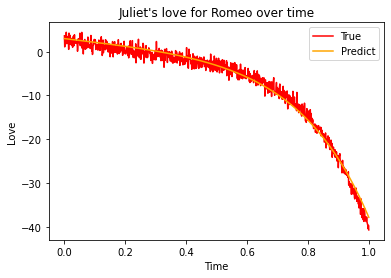

In [20]:
plt.plot(np.arange(0.001, 1.001, 0.001), data["J"], color = "red", label = "True")
plt.plot(np.arange(0.001, 1.001, 0.001), approx_values[:, 1], color = "orange", label = "Predict")
plt.title("Juliet's love for Romeo over time")
plt.xlabel("Time")
plt.ylabel("Love")
plt.legend()